## Titanic survival prediction

In this project I try to predit survival of people on titanic. This project is hosted by Kaggle.com

The detail of this project include:

- Data cleaning
- Data visualisation
- Feature engineering
- Data preprocessing for the model
- Create model and compare with different types of model
- Hyperparameter tuning
- Final submission

In [1]:
# import libraries for working with data
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "/kaggle/input/titanic/"
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
test.describe(include = "all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [7]:
# check for missing values
datasets = [train, test]
for data in datasets:
    print(data.isnull().sum())
    print("-"*20)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
--------------------


<Axes: >

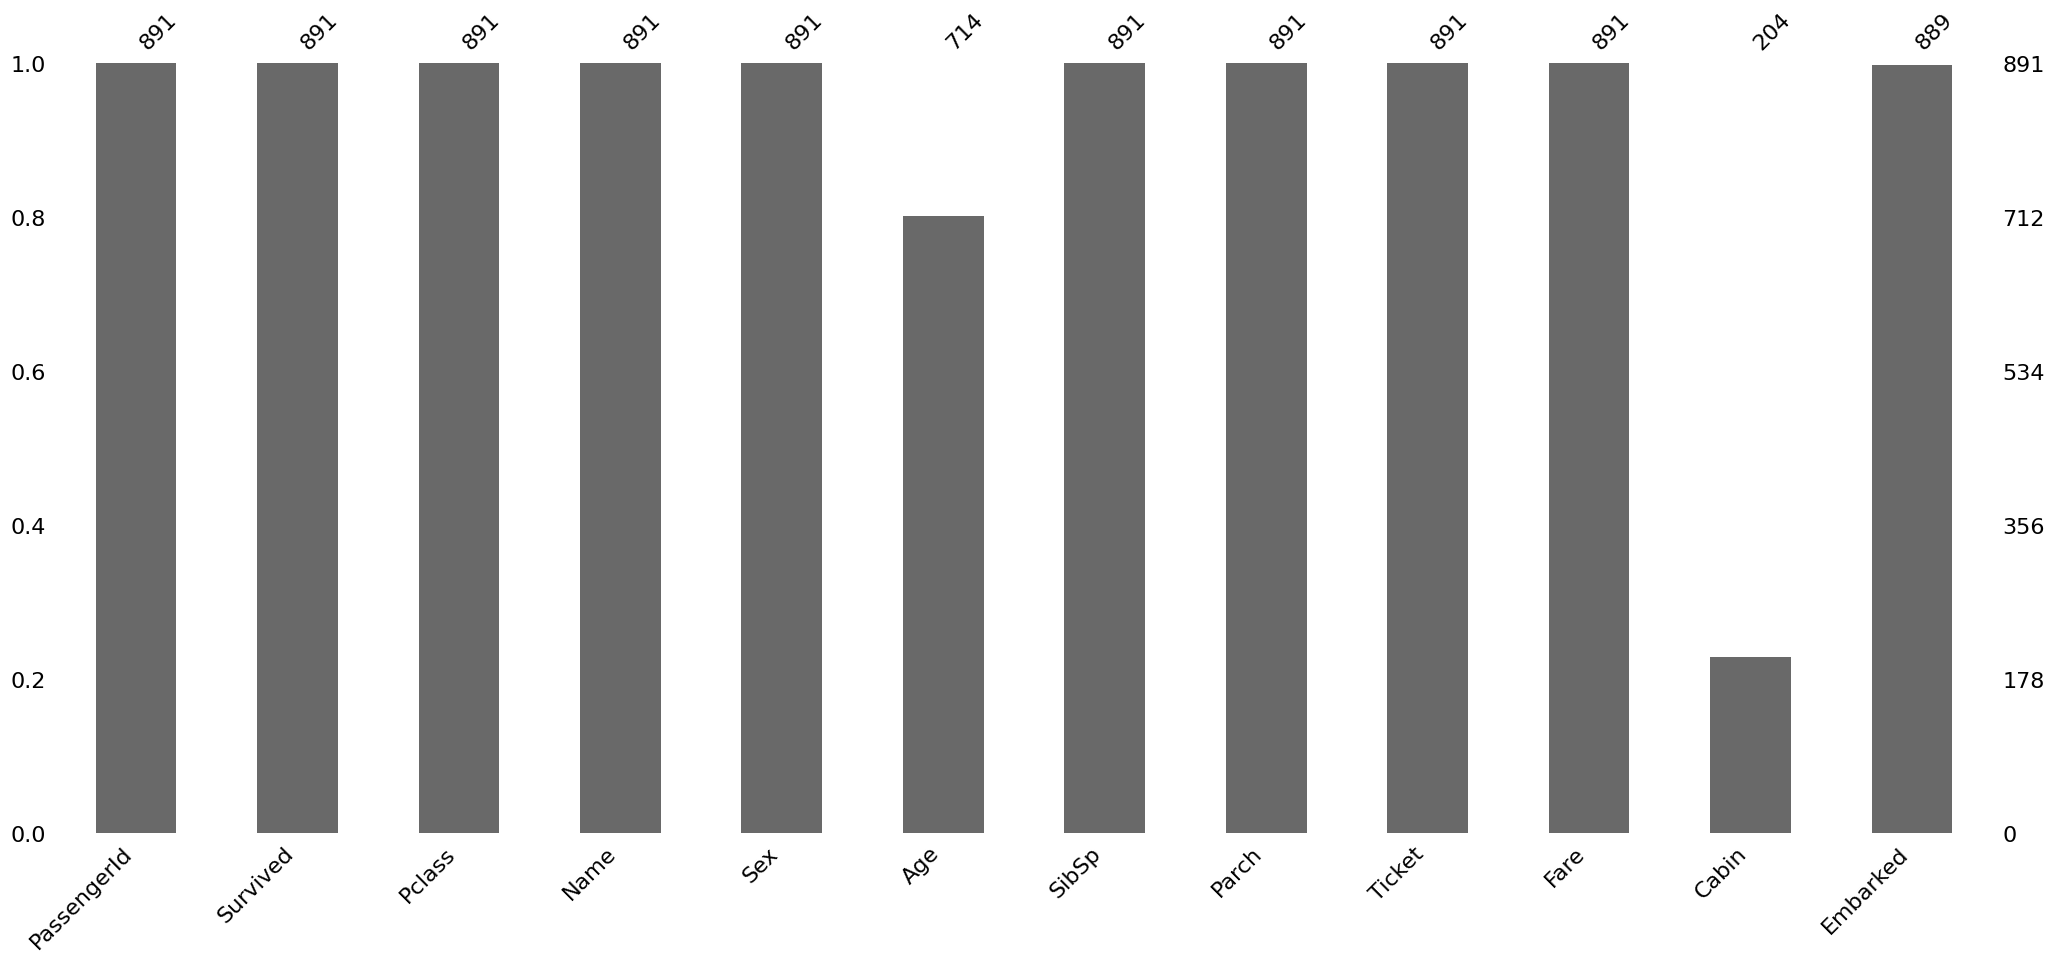

In [8]:
msno.bar(train)

<Axes: >

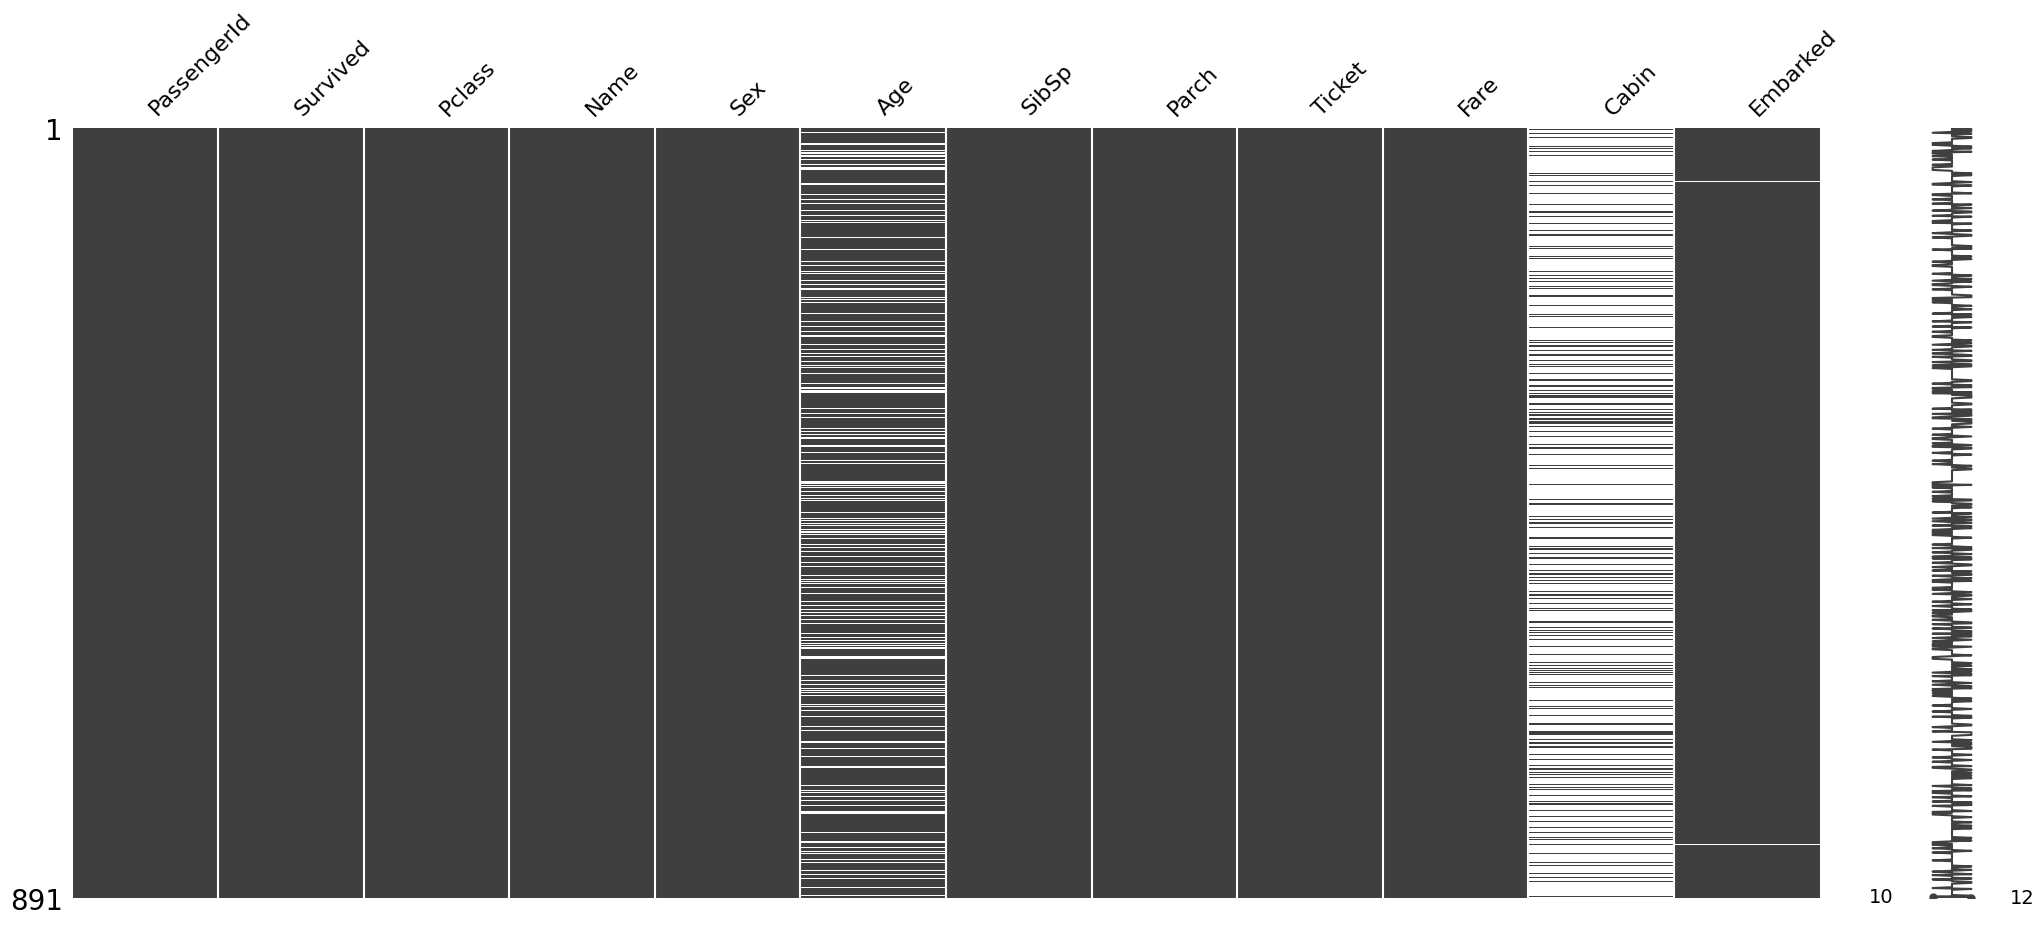

In [9]:
msno.matrix(train)

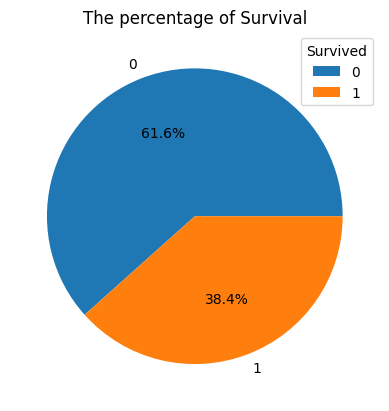

In [10]:
# Create a pie chart to see the percentage of Survived (Target variable)

survival = train['Survived'].value_counts()

plt.pie(survival,labels=survival.index, autopct="%1.1f%%")

plt.legend(title='Survived')
plt.title('The percentage of Survival')
plt.show()

In [11]:
# define custom functions for data transformation
def dummies_encode(train_df, test_df, column):
    train_df = pd.get_dummies(train_df, columns = [column], dtype = "int")
    test_df = pd.get_dummies(test_df, columns = [column], dtype = "int")
    return train_df, test_df

def label_encode(train_df, test_df, column):
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    train_df[column] = le.fit_transform(train_df[column])
    test_df[column] = le.transform(test_df[column])
    return train_df, test_df

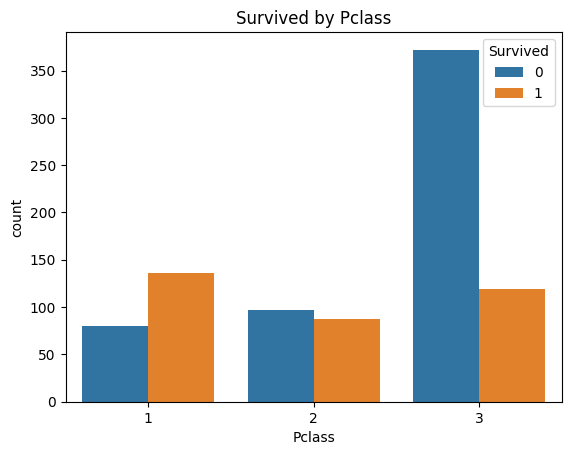

In [12]:
sns.countplot(x = train["Pclass"], hue = "Survived", data = train)
plt.title("Survived by Pclass")
plt.show()

In [13]:
# extract title from the name
datasets = [train, test]
for data in datasets:
    data["Title"] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [14]:
train["Title"].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [15]:
test["Title"].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [16]:
# Convert titles
for data in datasets:
    data['Title'] = data['Title'].replace(["Lady", "Countess","Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Ms', 'Miss')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')

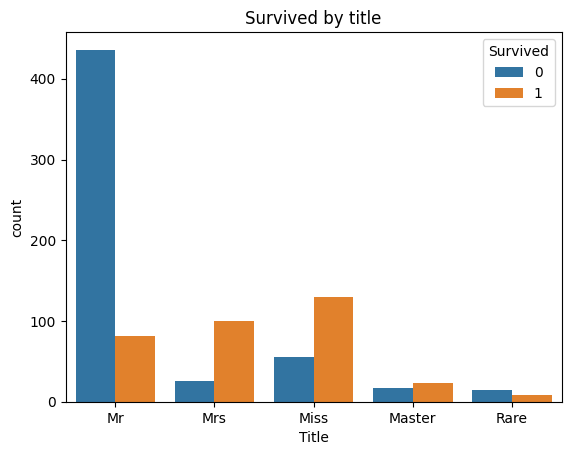

In [17]:
# Create a bar chart for the Distribution of Survived by Title
sns.countplot(x = train["Title"], hue = "Survived", data = train)
plt.title("Survived by title")
plt.show()

In [18]:
# Encode "Title" column to numeric values
train_up2, test_up2 = label_encode(train, test, "Title")

In [19]:
# Drop "Name" column
dataset = [train_up2, test_up2]
for data in dataset:
    data.drop(columns = "Name", inplace = True)

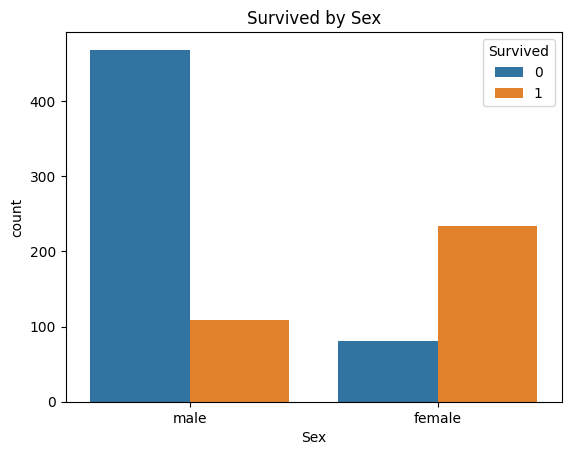

In [20]:
# Create bar chart for ditribution of Survived by Sex
sns.countplot(x = train_up2["Sex"], hue = "Survived", data = train_up2)
plt.title("Survived by Sex")
plt.show()

In [21]:
# Encode "Sec" column to numerical values
train_up3, test_up3 = label_encode(train_up2, test_up2, "Sex")

In [22]:
train_up3["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [23]:
train_up3["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [24]:
# Create new column "Family_size"
datasets = [train_up3, test_up3]
for data in datasets:
    data["Family_size"] = data["SibSp"] + data["Parch"] + 1

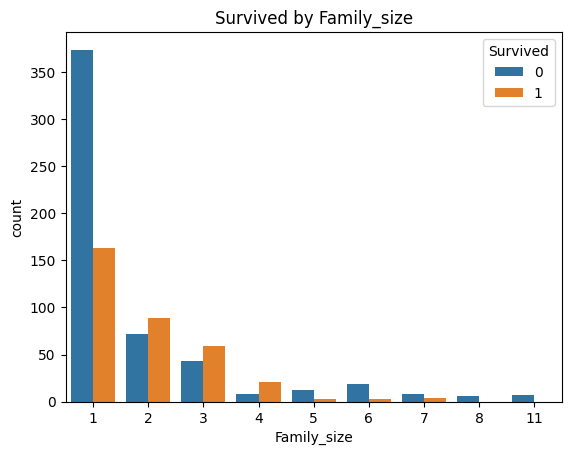

In [25]:
# Create bar chart for sitribution of Survived by Family_size
sns.countplot(x = train_up3["Family_size"], hue = "Survived", data = train_up3)
plt.title("Survived by Family_size")
plt.show()

In [26]:
train_up3["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [27]:
train_up3[train_up3["Ticket"] == "347082"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
13,14,0,3,1,39.0,1,5,347082,31.275,NaN,S,2,7
119,120,0,3,0,2.0,4,2,347082,31.275,NaN,S,1,7
541,542,0,3,0,9.0,4,2,347082,31.275,NaN,S,1,7
542,543,0,3,0,11.0,4,2,347082,31.275,NaN,S,1,7
610,611,0,3,0,39.0,1,5,347082,31.275,NaN,S,3,7
813,814,0,3,0,6.0,4,2,347082,31.275,NaN,S,1,7
850,851,0,3,1,4.0,4,2,347082,31.275,NaN,S,0,7


In [28]:
train_up3["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [29]:
train_up3[train_up3["Cabin"] == "B96 B98"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_size
390,391,1,1,1,36.0,1,2,113760,120.0,B96 B98,S,2,4
435,436,1,1,0,14.0,1,2,113760,120.0,B96 B98,S,1,4
763,764,1,1,0,36.0,1,2,113760,120.0,B96 B98,S,3,4
802,803,1,1,1,11.0,1,2,113760,120.0,B96 B98,S,0,4


In [30]:
# Drop "Ticket" and "Cabin" column, there is way to much missing values in "Cabin" column and "Ticket" column does not seem to have a usefull information
for data in datasets:
    data.drop(columns = ["Ticket", "Cabin"], inplace = True)

In [31]:
train_up3

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_size
0,1,0,3,1,22.0,1,0,7.2500,S,2,2
1,2,1,1,0,38.0,1,0,71.2833,C,3,2
2,3,1,3,0,26.0,0,0,7.9250,S,1,1
3,4,1,1,0,35.0,1,0,53.1000,S,3,2
4,5,0,3,1,35.0,0,0,8.0500,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S,4,1
887,888,1,1,0,19.0,0,0,30.0000,S,1,1
888,889,0,3,0,NaN,1,2,23.4500,S,1,4
889,890,1,1,1,26.0,0,0,30.0000,C,2,1


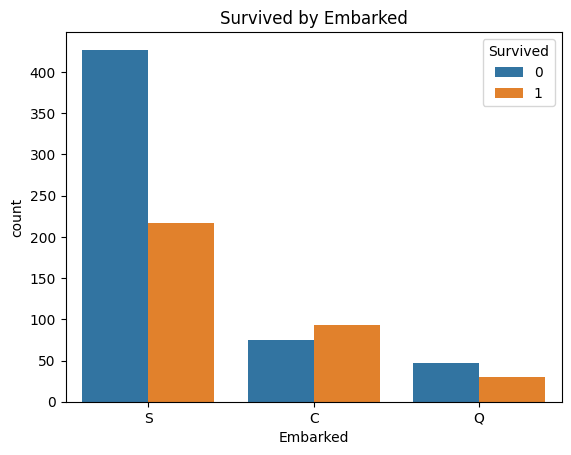

In [32]:
sns.countplot(x = train_up3["Embarked"], hue = "Survived", data = train_up3)
plt.title("Survived by Embarked")
plt.show()

In [33]:
# Encode "Embarked" column
train_up4, test_up4 = label_encode(train_up3, test_up3, column = "Embarked")

In [34]:
# Fill in one missing "Fare" value with median
test_up4["Fare"].fillna(train_up4["Fare"].median(), inplace = True)

In [35]:
# Create "Fare_band" column from "Fare" column
train_up4["Fare_band"] = pd.qcut(train_up4["Fare"], 6)

In [36]:
train_up4["Fare_band"].value_counts().sort_index()

Fare_band
(-0.001, 7.775]      156
(7.775, 8.662]       152
(8.662, 14.454]      139
(14.454, 26.0]       149
(26.0, 52.369]       146
(52.369, 512.329]    149
Name: count, dtype: int64

In [37]:
# Create empty "Fare_band" column for test df
test_up4["Fare_band"] = np.nan

In [38]:
# Split "Fare" into "Fare_band" for test df same way it did for train df
test_up4.loc[test_up4["Fare"] <= 7.775, "Fare_band"] = 0
test_up4.loc[(test_up4["Fare"] > 7.775) & (test_up4["Fare"] <= 8.662), "Fare_band"] = 1
test_up4.loc[(test_up4["Fare"] > 8.662) & (test_up4["Fare"] <= 14.454), "Fare_band"] = 2
test_up4.loc[(test_up4["Fare"] > 14.454) & (test_up4["Fare"] <= 26), "Fare_band"] = 3
test_up4.loc[(test_up4["Fare"] > 26) & (test_up4["Fare"] <= 52.369), "Fare_band"] = 4
test_up4.loc[test_up4["Fare"] > 52.369, "Fare_band"] = 5

In [39]:
test_up4["Fare_band"].value_counts(dropna = False)

Fare_band
0.0    80
3.0    80
5.0    75
2.0    69
1.0    58
4.0    56
Name: count, dtype: int64

In [40]:
# Transform "Fare_band" in train df
le = LabelEncoder()
train_up4["Fare_band"] = le.fit_transform(train_up4["Fare_band"])

# Drop "Fare" column from both dfs
dataset = [train_up4, test_up4]
for data in dataset:
    data.drop(columns = ["Fare"], inplace = True)

In [41]:
# Check if the "Fare_band" mapping is the same in test and train dfs
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

# Print the mapping
print("Label Mapping:")
for label, encoded_label in label_mapping.items():
    print(f"{label}: {encoded_label}")

Label Mapping:
(-0.001, 7.775]: 0
(7.775, 8.662]: 1
(8.662, 14.454]: 2
(14.454, 26.0]: 3
(26.0, 52.369]: 4
(52.369, 512.329]: 5


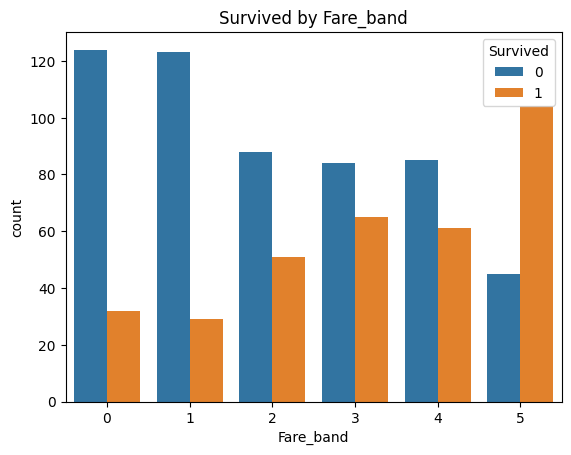

In [42]:
sns.countplot(x = train_up4["Fare_band"], hue = "Survived", data = train_up4)
plt.title("Survived by Fare_band")
plt.show()

In [43]:
# Create quantile base "Age_qband" for "Age" column
for data in dataset:
    data["Age_qband"] = pd.qcut(data["Age"], 10)

In [44]:
train_up4["Age_qband"].value_counts(dropna = False).sort_index()

Age_qband
(0.419, 14.0]     77
(14.0, 19.0]      87
(19.0, 22.0]      67
(22.0, 25.0]      70
(25.0, 28.0]      61
(28.0, 31.8]      66
(31.8, 36.0]      91
(36.0, 41.0]      53
(41.0, 50.0]      78
(50.0, 80.0]      64
NaN              177
Name: count, dtype: int64

In [45]:
test_up4["Age_qband"].value_counts(dropna = False).sort_index()

Age_qband
(0.169, 16.1]    34
(16.1, 20.0]     35
(20.0, 22.0]     33
(22.0, 25.0]     40
(25.0, 27.0]     25
(27.0, 30.0]     33
(30.0, 36.0]     36
(36.0, 42.0]     30
(42.0, 50.0]     35
(50.0, 76.0]     31
NaN              86
Name: count, dtype: int64

In [46]:
# Map both dfs based on the train bins
for data in dataset:
    data["New_qage"] = np.nan
    data.loc[data["Age"] <= 14, "New_qage"] = 0
    data.loc[(data["Age"] > 14) & (data["Age"] <= 19), "New_qage"] = 1
    data.loc[(data["Age"] > 19) & (data["Age"] <= 22), "New_qage"] = 2
    data.loc[(data["Age"] > 22) & (data["Age"] <= 25), "New_qage"] = 3
    data.loc[(data["Age"] > 25) & (data["Age"] <= 28), "New_qage"] = 4
    data.loc[(data["Age"] > 28) & (data["Age"] <= 31), "New_qage"] = 5
    data.loc[(data["Age"] > 31) & (data["Age"] <= 36), "New_qage"] = 6
    data.loc[(data["Age"] > 36) & (data["Age"] <= 41), "New_qage"] = 7
    data.loc[(data["Age"] > 41) & (data["Age"] <= 50), "New_qage"] = 8
    data.loc[data["Age"] > 50, "New_qage"] = 9
    
    # Drop "Age" and "Age_qband" columns
    data.drop(columns = ["Age", "Age_qband"], inplace = True)

In [47]:
train_up4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Embarked     891 non-null    int64  
 7   Title        891 non-null    int64  
 8   Family_size  891 non-null    int64  
 9   Fare_band    891 non-null    int64  
 10  New_qage     714 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 76.7 KB


In [48]:
# Predict "New_qage" for the missing values with RandomForestClassifier

# Separate missing values
train_known_age = train_up4[train_up4["New_qage"].notnull()]
train_unknown_age = train_up4[train_up4["New_qage"].isnull()]
test_unknown_age = test_up4[test_up4["New_qage"].isnull()]

# Features for prediction, selected base on mutual information of "New_qage"
features = ["SibSp", "Parch", "Pclass", "Family_size", "Title", "Fare_band"]

# Train a model to predict "New_qage"
rf_model = RandomForestClassifier()
rf_model.fit(train_known_age[features], train_known_age["New_qage"])

# Predict missing "New_qage" values
predicted_train_age = rf_model.predict(train_unknown_age[features])
predicted_test_age = rf_model.predict(test_unknown_age[features])

# Fill in missing "New_qage" values with predictions
train_up4.loc[train_up4["New_qage"].isnull(), "New_qage"] = predicted_train_age
test_up4.loc[test_up4["New_qage"].isnull(), "New_qage"] = predicted_test_age

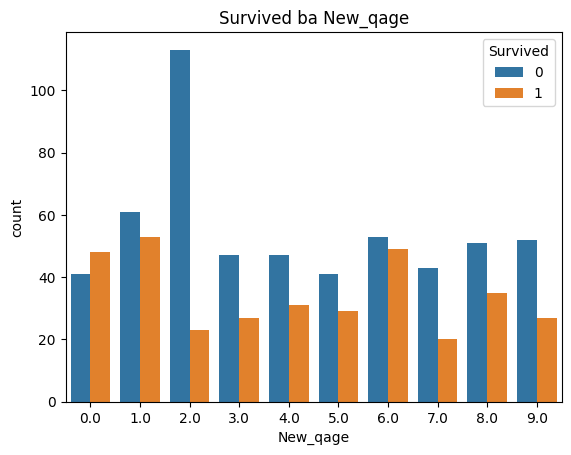

In [49]:
sns.countplot(x = train_up4["New_qage"], hue = "Survived", data = train_up4)
plt.title("Survived ba New_qage")
plt.show()

In [50]:
# Define custom get_mutual_info func
def get_mutual_info(df):
    from sklearn.feature_selection import mutual_info_classif
    MI_df = df.copy(deep = True)
    
    y = MI_df["Survived"]
    X = MI_df.drop(columns = ["PassengerId", "Survived"])
    
    MI = mutual_info_classif(X, y)
    MI_df = pd.DataFrame(MI, index = X.columns, columns = ["Mutual_info"])
    MI_df_sorted = MI_df.sort_values(by = "Mutual_info")
    return MI_df_sorted
    

In [51]:
# Define custom PCA function, takes both dfs, standardizes it and return PCA matrix
def stand_PCA(train, test, n_pca = 10):
    # import StandardScaler and PCA
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    # deep copy
    train_df = train.copy(deep = True)
    test_df = test.copy(deep = True)
    
    # remove PassengerId and Survived
    train_PId_S = train_df[["PassengerId", "Survived"]]
    train_df = train_df.drop(columns = ["PassengerId", "Survived"])
    test_PId = test_df["PassengerId"]
    test_df = test_df.drop(columns = ["PassengerId"])
    
    # scale all the values
    ss = StandardScaler()
    train_s = ss.fit_transform(train_df)
    test_s = ss.transform(test_df)
    
    # do PCA
    pca = PCA(n_components = n_pca)
    train_pca = pca.fit_transform(train_s)
    test_pca = pca.transform(test_s)
    
    # convert to Dataframes and merge together with PassengerId and/ or Survived
    column_names = [f"PC{1 + i}" for i in range(n_pca)]
    train_to_df = pd.DataFrame(train_pca, columns = column_names)
    test_to_df = pd.DataFrame(test_pca, columns = column_names)
    train_final = pd.merge(train_to_df, train_PId_S, left_index = True, right_index = True, how = "inner")
    test_final = pd.merge(test_to_df, test_PId, left_index = True, right_index = True, how = "inner")
    
    return train_final, test_final

In [52]:
number_of_comp = 8
final_train_stand, final_test_stand = stand_PCA(train_up4, test_up4, n_pca = number_of_comp)

In [53]:
mi = get_mutual_info(train_up4)
mi

,Mutual_info
SibSp,0.000000
Embarked,0.000000
Parch,0.003085
New_qage,0.012716
Pclass,0.045382
Family_size,0.049234
Fare_band,0.054879
Sex,0.157929
Title,0.165288


In [54]:
s_mi = get_mutual_info(final_train_stand)
s_mi

,Mutual_info
PC7,0.119650
PC8,0.121853
PC4,0.158255
PC5,0.160444
PC2,0.161133
PC6,0.162060
PC1,0.177087
PC3,0.198375


In [55]:
final_train_stand

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PassengerId,Survived
0,-0.470516,-1.764533,-0.747532,-0.182950,-0.256015,-0.535559,-0.201402,-0.556296,1,0
1,0.325405,3.035414,1.273883,0.324280,-1.094194,-1.128341,0.085485,0.012357,2,1
2,-0.540665,-1.199943,0.722285,1.219893,1.062317,-0.074292,0.872734,0.121313,3,1
3,0.422576,2.501795,-0.290364,0.847721,0.669727,-1.276710,-0.479280,-0.012825,4,1
4,-1.364071,-0.731461,-0.889933,-0.001310,-0.059628,0.174992,0.474027,0.180481,5,0
...,...,...,...,...,...,...,...,...,...,...
886,-1.500792,0.806821,-1.473909,0.397930,-0.827882,-0.654607,-1.600277,-0.291491,887,0
887,0.282923,0.617192,1.546372,0.242249,2.251600,-0.259998,-0.747243,-0.261880,888,1
888,2.755248,-1.323798,0.430913,1.195979,0.550945,0.900605,-0.363713,0.199356,889,0
889,-0.637653,1.619293,1.498401,-1.502395,-0.634266,0.137654,-0.581186,-0.177529,890,1


In [56]:
y_pca = final_train_stand["Survived"]
X_pca = final_train_stand[[f"PC{1 + i}" for i in range(number_of_comp)]]


y = train_up4["Survived"]
X = train_up4[["Title", "Sex", "Fare_band", "Family_size", "Pclass", "New_qage", "Parch", "SibSp", "Embarked"]]


In [57]:
# Compare model to see how various different models perform with default parameters
def get_classifiers_scores(X, y):
    models = [RandomForestClassifier(random_state = 42), 
                   GradientBoostingClassifier(random_state = 42), 
                   AdaBoostClassifier(random_state = 42), 
                   BaggingClassifier(random_state = 42),
                   ExtraTreesClassifier(random_state = 42),
                   HistGradientBoostingClassifier(random_state = 42),
                   DecisionTreeClassifier(random_state = 42),
                   SVC(random_state = 42),
                   XGBClassifier(random_state = 42)]
    classifiers = ["RandomForestClassifier",
                   "GradientBoostingClassifier",
                   "AdaBoostClassifier",
                   "BaggingClassifier",
                   "ExtraTreesClassifier",
                   "HistGradientBoostingClassifier",
                   "DecisionTreeClassifier",
                   "SVC",
                   "xgb"]

    cv_mean = []
    cv_std = []

    for model in models:
        model = model
        cv = cross_val_score(model,X,y,cv=10)
        cv_std.append(cv.std())
        cv_mean.append(cv.mean())

    cv_dataframe = pd.DataFrame({"CV Mean": cv_mean,"Std": cv_std}, index = classifiers)       
    cv_dataframe = cv_dataframe.sort_values(by = ["CV Mean"], ascending = False)
    return cv_dataframe


In [58]:
get_classifiers_scores(X, y)

,CV Mean,Std
SVC,0.829401,0.035476
GradientBoostingClassifier,0.827216,0.039947
HistGradientBoostingClassifier,0.818265,0.046079
AdaBoostClassifier,0.814806,0.026280
xgb,0.811523,0.039324
RandomForestClassifier,0.810362,0.034000
ExtraTreesClassifier,0.805880,0.034526
BaggingClassifier,0.801411,0.035788
DecisionTreeClassifier,0.785655,0.032577


In [59]:
get_classifiers_scores(X_pca, y_pca)

,CV Mean,Std
SVC,0.830524,0.034624
GradientBoostingClassifier,0.809226,0.036094
AdaBoostClassifier,0.805880,0.028519
xgb,0.802522,0.036288
HistGradientBoostingClassifier,0.801411,0.039797
RandomForestClassifier,0.800275,0.037198
ExtraTreesClassifier,0.799139,0.035085
BaggingClassifier,0.798015,0.032302
DecisionTreeClassifier,0.781111,0.038182


In [60]:
# Vizialization of diferent trees
"""
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

#plot_tree(full_data_model.estimators_[0])
#plt.show()
tree = full_data_model.estimators_[0]

dot_data = export_graphviz(tree, feature_names = ["Title", "Sex", "Fare_band", "Family_size", "Pclass", "New_qage", "Parch", "SibSp", "Embarked"],
                          class_names = ["0", "1"], filled = True, proportion = False, rounded = True)
graph = graphviz.Source(dot_data)
"""

'\nfrom sklearn.tree import plot_tree\nfrom sklearn.tree import export_graphviz\nimport graphviz\n\n#plot_tree(full_data_model.estimators_[0])\n#plt.show()\ntree = full_data_model.estimators_[0]\n\ndot_data = export_graphviz(tree, feature_names = ["Title", "Sex", "Fare_band", "Family_size", "Pclass", "New_qage", "Parch", "SibSp", "Embarked"],\n                          class_names = ["0", "1"], filled = True, proportion = False, rounded = True)\ngraph = graphviz.Source(dot_data)\n'

## Hyper parameter tuning
- note: I will commet out all the code so it does not run when saving since it takes a long time

In [61]:
# Decision Tree Classifier

# parameters = {"max_depth":range(1,30), 
#               "criterion": ["entropy", "gini"]}
# 
# dt_tune = GridSearchCV(estimator=DecisionTreeClassifier(random_state = 42), 
#                         param_grid=parameters, 
#                         verbose=False, 
#                         cv=10,
#                         n_jobs = -1)
# 
# dt_tune.fit(X, y) 
# 
# dt_model = dt_tune.best_estimator_
# 
# print (dt_tune.best_score_)
# print (dt_tune.best_params_)
# print (dt_tune.best_estimator_)

In [62]:
# After running this code:
# 0.8282771535580524
# {'criterion': 'entropy', 'max_depth': 3}
# DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [63]:
# Support Vector Classifier

# parameters = {"kernel": ["rbf"], 
#               "gamma": [0.01,0.02,0.05,0.1,0.5],
#               "C": [0.1, 0.5,1,2,3,4,5,6,7,8]},
# 
# svc_tune = GridSearchCV(SVC(probability=True, random_state = 42), 
#                          param_grid=parameters, 
#                          cv=10) 
# 
# svc_tune.fit(X,y)
# 
# svc_model = svc_tune.best_estimator_
# 
# print(svc_tune.best_score_)
# print(svc_tune.best_params_)
# print(svc_tune.best_estimator_)

In [64]:
# After running this code:
# 0.8316479400749064
# {'C': 2, 'gamma': 0.02, 'kernel': 'rbf'}
# SVC(C=2, gamma=0.02, probability=True, random_state=42)


In [65]:
#Extream Gradient Boosting Classifier

# parameters = {'n_estimators':[100,200,300,400,500],
#               'max_depth':range(1,10),
#               'learning_rate': [0.01,0.02,0.05,1],
#               'colsample_bytree': [0.75,0.8,0.85],
#               'subsample': [0.55, 0.6, 0.65,0.7],
#               'min_child_weight':[0.01,0.1]
#               }
# 
# xgb_tune = GridSearchCV(estimator=XGBClassifier(random_state = 42),
#                           param_grid=parameters,
#                           cv=5,
#                           n_jobs = -1)
# xgb_tune.fit(X,y) 
# 
# print ('XGB Best score :', xgb_tune.best_score_)
# print ('XGB Best parameter :', xgb_tune.best_params_)
# print ('XGB Best estimator :', xgb_tune.best_estimator_)

In [66]:
# After running this code:
# XGB Best score : 0.8350260498399347
# XGB Best parameter : {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 0.01, 'n_estimators': 400, 'subsample': 0.55}
# XGB Best estimator : XGBClassifier(base_score=None, booster=None, callbacks=None,
#             colsample_bylevel=None, colsample_bynode=None,
#              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
#              enable_categorical=False, eval_metric=None, feature_types=None,
#              gamma=None, grow_policy=None, importance_type=None,
#              interaction_constraints=None, learning_rate=0.05, max_bin=None,
#              max_cat_threshold=None, max_cat_to_onehot=None,
#              max_delta_step=None, max_depth=2, max_leaves=None,
#              min_child_weight=0.01, missing=nan, monotone_constraints=None,
#              multi_strategy=None, n_estimators=400, n_jobs=None,
#              num_parallel_tree=None, random_state=42, ...)

In [67]:
# # Random Forest Classifier

# parameters = {'n_estimators':[100,200,300,400,500],
#               'max_depth':range(1,10),
#               'min_samples_leaf': [2,4,6,8,10],
#               'min_samples_split': [2,4,6,8,10,12,14,16,20],
#               'criterion': ['gini', 'entropy']
#              }
# 
# rf_tune = GridSearchCV(estimator=RandomForestClassifier(random_state = 42),
#                          param_grid=parameters,
#                          cv=5,
#                          n_jobs = -1)
# 
# rf_tune.fit(X,y) 
# 
# print ('RF best score :' , rf_tune.best_score_)
# print ('RF Best parameter :' , rf_tune.best_params_)
# print ('RF Best estimator :',rf_tune.best_estimator_)

In [68]:
# After running this code:
# RF best score : 0.8349946644906158
# RF Best parameter : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
# RF Best estimator : RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=200,
#                        random_state=42)

In [69]:
# Gradient Boosting Classifier

# parameters = {'n_estimators':[100,200,300,400,500],
#               'max_depth':range(1,10),
#               'learning_rate': [0.01,0.02,0.05,1]
#               }
# 
# gbm_tune = GridSearchCV(estimator=GradientBoostingClassifier(random_state = 42),
#                          param_grid=parameters,
#                          cv=5,
#                          n_jobs = -1)
# 
# gbm_tune.fit(X,y) 
# 
# print ('GBM best score :', gbm_tune.best_score_)
# print ('GBM best parameters :', gbm_tune.best_params_)
# print ('GBM best estimator :', gbm_tune.best_estimator_)

In [70]:
# After running this code:
# GBM best score : 0.8372606867114432
# GBM best parameters : {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
# GBM best estimator : GradientBoostingClassifier(learning_rate=0.01, random_state=42)

In [71]:
# Extra Trees Classifier

# parameters = {'n_estimators':[100,200,300,500,1000],
#               'max_depth':range(1,10),
#               'criterion': ['gini', 'entropy']
#                }
# 
# et_tune = GridSearchCV(estimator=ExtraTreesClassifier(random_state = 42),
#                                  param_grid=parameters,
#                                  cv=5,
#                                  n_jobs = -1)
# et_tune.fit(X,y) 
# 
# et_model = et_tune.best_estimator_
# 
# print (et_tune.best_score_)
# print (et_tune.best_params_)
# print (et_tune.best_estimator_)

In [72]:
# After running this code:
# 0.8282719226664993
# {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
# ExtraTreesClassifier(max_depth=5, random_state=42)

In [73]:
# Ada Boost Classifier

# parameters = {'n_estimators':[100,200,300,500,1000],
#               'learning_rate':[0.01,0.02,0.5]
#               }
# 
# adb_tune = GridSearchCV(AdaBoostClassifier(random_state = 42),
#                                  param_grid=parameters,
#                                  cv=5,
#                                  n_jobs = -1)
# adb_tune.fit(X,y) 
# 
# adb_model = adb_tune.best_estimator_
# 
# print (adb_tune.best_score_)
# print (adb_tune.best_params_)
# print (adb_tune.best_estimator_)

In [74]:
# After running this code:
# 0.8282781997363632
# {'learning_rate': 0.01, 'n_estimators': 1000}
# AdaBoostClassifier(learning_rate=0.01, n_estimators=1000, random_state=42)

In [75]:
scores_list=[]

scores_list = [["XGB",0.83502],
               ["GBM",0.83726],
               ["ET",0.82827],
               ["RF",0.83499], 
               ["SVC",0.83164],
               ["DT",0.82827],
               ["ADB",0.82827],
              ]

scores = (pd.DataFrame(scores_list,columns = ["Model", "Score"])).sort_values(by=["Score"], ascending=False )

scores

,Model,Score
1,GBM,0.83726
0,XGB,0.83502
3,RF,0.83499
4,SVC,0.83164
2,ET,0.82827
5,DT,0.82827
6,ADB,0.82827


## Voting

In [76]:
# Voting Classifier

rf_model = RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=200, random_state=42)
gbm_model = GradientBoostingClassifier(learning_rate=0.01, random_state=42)
xgb_model = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth = 2, min_child_weight = 0.01, n_estimators = 400, subsample = 0.55, random_state = 42)
svc_model = SVC(C=2, gamma=0.02, probability=True, random_state=42)
et_model = ExtraTreesClassifier(max_depth=5, random_state=42)
# Define estimators
estimators = [('RF',rf_model),
              ('GBM',gbm_model),
              #('DT',dt_model),
              ('SVC',svc_model), 
              ('XGB', xgb_model),
              ('ET',et_model),
              #('ADB',adb_model),
             ]

voting_model = VotingClassifier(estimators=estimators,
                                voting='soft')

voting_soft = voting_model.fit(X, y)

voting_cv = cross_val_score(voting_model,X,y, cv = 10,
                            scoring = "accuracy").mean()

voting_cv

0.8350187265917602

## Stacking

In [77]:
# Stacking Classifier

estimators = [('RF',rf_model),
              ('GBM',gbm_model),
              #('DT',dt_model),
              #('SVC',svc_model), 
              ('XGB', xgb_model),
              #('ET',et_model),
              #('ADB',adb_model),
             ]

stacked_model = StackingClassifier(estimators=estimators)

stacked_model.fit(X, y)

stacked_cv = cross_val_score(stacked_model,X,y, cv = 10,
                             scoring = "accuracy").mean()

stacked_cv

0.8282896379525593

In [78]:
full_data_model = RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=200, random_state=42)
full_data_model.fit(X, y)
test_pred = full_data_model.predict(test_up4[["Title", "Sex", "Fare_band", "Family_size", "Pclass", "New_qage", "Parch", "SibSp", "Embarked"]])

In [79]:

output = pd.DataFrame({"PassengerId": final_test_stand.PassengerId,
                      "Survived": test_pred})
output.to_csv("RF_final_submission", index=False)


## Public score after submission

- Public score of **Random forest: 0.77751**
- Public score of Gradient boosting: 0.77511
- Public score of Support vector: 0.77511
- Public score of Extra trees: 0.77511
- Public score of Decision tree: 0.77511
- Public score of Ada boosting: 0.77511
- Public score of Extreme gradient boosting: 0.76794


- Public score of Voting_5: 0.77033
- Public score of Stacking_3: 0.76794
- Public score of Voting_3: 0.76794
- Public score of Stacking_5: 0.76555